In [1]:
import gluoncv as gcv
import mxnet as mx
# mxnet NDarray 
from mxnet import nd

# MXNet Gluon Neural network layers.
from mxnet.gluon import nn

# optional for displaying the image
import ipyplot  # Need to remove this and quit using it
import matplotlib.pyplot as plt
import numpy as np
import os
# pip install pillow but import PIL
from PIL import Image

# Loading images via  PIL and numpy

In [2]:
# setup file system locations
# yes, this should use os file path TODO: fix it
TOP_DIR='../'
print('TOP_DIR = ', TOP_DIR)
ICY_BRIDGE_DIR = TOP_DIR + 'icy-bridge/'
print('TOP_DIR = ', ICY_BRIDGE_DIR)
MODEL_NAME = 'c6'
MODEL_TOP_DIR = ICY_BRIDGE_DIR + MODEL_NAME + '/'
print('MODEL_TOP_DIR = ', MODEL_TOP_DIR)
MODEL_RAW_IMAGE_DIR = MODEL_TOP_DIR + 'raw/'
MODEL_POST_IMAGE_DIR = MODEL_TOP_DIR + 'post_rotate_crop/'
print('MODEL_RAW_IMAGE_DIR = ', MODEL_RAW_IMAGE_DIR)
print('MODEL_POST_IMAGE_DIR = ', MODEL_POST_IMAGE_DIR)

TOP_DIR =  ../
TOP_DIR =  ../icy-bridge/
MODEL_TOP_DIR =  ../icy-bridge/c6/
MODEL_RAW_IMAGE_DIR =  ../icy-bridge/c6/raw/
MODEL_POST_IMAGE_DIR =  ../icy-bridge/c6/post_rotate_crop/


In [5]:
# test to make sure directory is correct
my_limit = 3
for a_obj_name in os.listdir(MODEL_RAW_IMAGE_DIR):
    my_limit = my_limit - 1
    if my_limit < 0:
        break
    print(a_obj_name)


BUS40_SALEM_20220115Z1655.jpg
BUS40_SALEM_20220117Z0940.jpg
BUS40_SALEM_20220114Z1255.jpg


In [6]:
# load an image using numpy and display it.
def show_it(an_nparray, viewit=False):
    if viewit:
        print("array is ", an_nparray)
    print("shape is ", an_nparray.shape)
    print("dtype is ", an_nparray.dtype)
    print("ndim is ", an_nparray.ndim)
    print("itemsize is ", an_nparray.itemsize) # size in bytes of each array element
    print("nbytes is ", an_nparray.nbytes) # size in bytes of each array element
    if viewit:
        print("view is ", an_nparray.view)
    #print("order is ", an_array.order)
    #print("type is ", img_filename_array.type)
    #print("descr is ", img_filename_array.descr)
    if viewit:
        ipyplot.plot_images(an_nparray)

In [7]:
# a grayscale png
stimpyG_filepath = 'imgs/stimpyG.png'
stimpyG_nparray = np.array([stimpy_filepath])
# array(['imgs/stimpyG.png'], dtype='<U16')
show_it(stimpyG_nparray, True)
# show it says this is a scalar.  Its just a filename.
# The filename is passed to ipyplot and it dumps the image 
# by reading the filename
print(stimpyG_nparray[0]) # there is not index 1
# you can also tell if you try to plot it as an array
# It will fail
#plt.imshow(stimpyG_nparray, cmap='gray')

# you can 
png_pil_img = Image.open(stimpyG_filepath)
print(png_pil_img.format, png_pil_img.size, png_pil_img.mode)
png_np_img = np.asarray(png_pil_img)
plt.imshow(png_np_img, cmap='gray')
show_it(png_np_img)

NameError: name 'stimpy_filepath' is not defined

show the jpeg as an array
array is  ['../icy-bridge/c6/raw/BUS40_SALEM_20220114Z1255.jpg']
shape is  (1,)
dtype is  <U50
ndim is  1
itemsize is  200
nbytes is  200
view is  <built-in method view of numpy.ndarray object at 0x7f9588fca450>


JPEG (704, 480) RGB
shape is  (480, 704, 3)
dtype is  uint8
ndim is  3
itemsize is  1
nbytes is  1013760


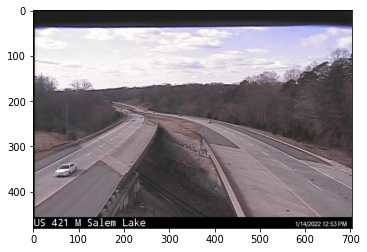

In [8]:
# a color jpeg
jpegC_filepath = MODEL_RAW_IMAGE_DIR + 'BUS40_SALEM_20220114Z1255.jpg'
# This is a jpeg. Its compressed images
jpegC_nparray = np.array([jpegC_filepath])
print("show the jpeg as an array")
show_it(jpegC_nparray, True)
# this doesn't work because its not a bitmap.

# you can work around it using python image library to perfrom decompression

jpegC_pil_img = Image.open(jpegC_filepath)
# this will show its JPEG 704x480 and RGB (color)
print(jpegC_pil_img.format, jpegC_pil_img.size, jpegC_pil_img.mode)
# sadly this does not work on my box since it has this bug
# https://github.com/python-pillow/Pillow/issues/5945
# jpegC_pil_img.sho

# convert to nparray
jpegC_np_img = np.asarray(jpegC_pil_img)
# note this will fail with ipyplot
#show_it(jpegC_np_img)
# But if I try to print it using just the array, which it is now it will
plt.imshow(jpegC_np_img)
show_it(jpegC_np_img)


All of this is immaterial because I want to use mxnet to do my transforms, but it helps to have example code
around if I suspect something is wrong.  I can use alternative means to manipulate it.

# Loading images via Apache MXNet

image_HWC1
<class 'mxnet.ndarray.ndarray.NDArray'>
(480, 640, 1)
image_HWC1f
<class 'mxnet.ndarray.ndarray.NDArray'>
(480, 640, 1)


NameError: name 'image_filepath' is not defined

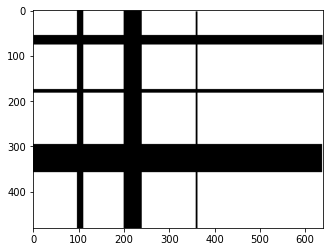

In [9]:
# read as grayscale
image_HWC1 = mx.image.imread('imgs/testy-grid.png', 0)
image_HWC1f = image_HWC1.astype('float32')
print("image_HWC1")
print(type(image_HWC1))
print(image_HWC1.shape)
print("image_HWC1f")
print(type(image_HWC1f))
print(image_HWC1f.shape)
# plot image as grayscale
plt.imshow(image_HWC1.asnumpy(), cmap='gray')

# read as grayscale
image_HWC1 = mx.image.imread(image_filepath, 0)
image_HWC1f = image_HWC1.astype('float32')
print("image_HWC1")
print(type(image_HWC1))
print(image_HWC1.shape)
print("image_HWC1f")
print(type(image_HWC1f))
print(image_HWC1f.shape)
# plot image as grayscale
plt.imshow(image_HWC1.asnumpy(), cmap='gray')